In [1]:
# Let's try a simple parcellation map from a standard atlas
from niwidgets import NiftiWidget
from niwidgets import examplet1

test_widget = NiftiWidget(examplet1)
test_widget.nifti_plotter()

/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/niwidget_volume.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  else np.fliplr(np.flipud(np.rot90(data[slice_obj], k=1)))
/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/niwidget_volume.py:196: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if views[ii] != "Sagittal"


<Figure size 432x288 with 0 Axes>

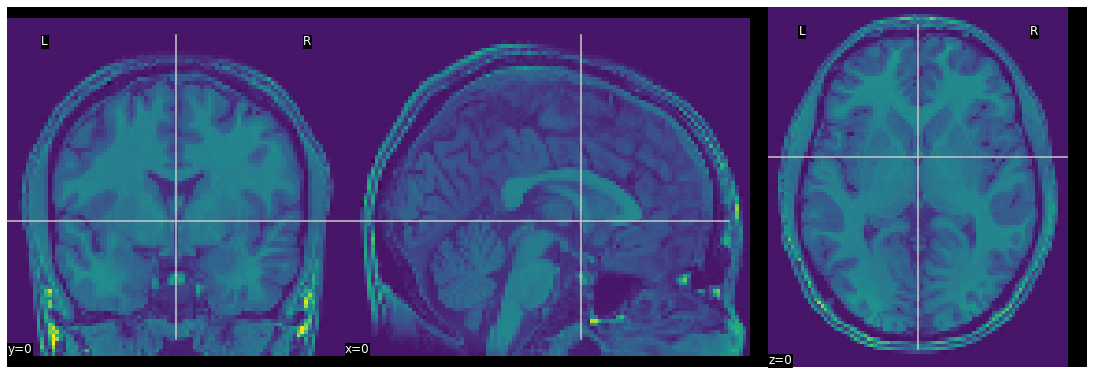

In [4]:
import nilearn.plotting as nip

test_widget.nifti_plotter(plotting_func=nip.plot_epi, display_mode=['ortho', 'x', 'y', 'z', 'yx', 'xz', 'yz'])

In [8]:
type(examplet1)
examplet1

'/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/data/T1.nii.gz'

In [10]:
type(examplezmap)
examplezmap

'/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/data/cognitive control_pFgA_z.nii.gz'

In [13]:
type(examplesurface)
examplesurface

'/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/data/example_surfaces/lh.inflated'

In [20]:
type(test)
test

<Figure size 432x288 with 0 Axes>

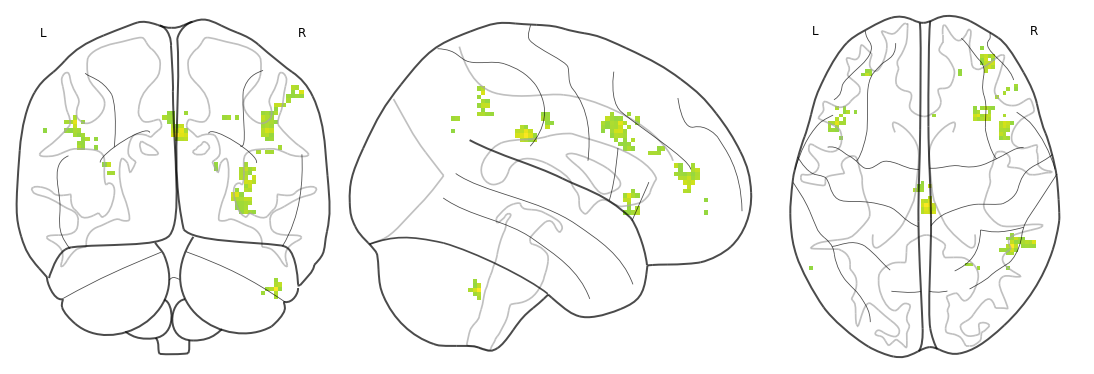

In [11]:
from niwidgets import examplezmap
import nilearn.plotting as nip
test = NiftiWidget(examplezmap)
test.nifti_plotter(plotting_func=nip.plot_glass_brain, threshold=(0.0, 10.0, 0.01),
                   display_mode=['ortho','xz'])

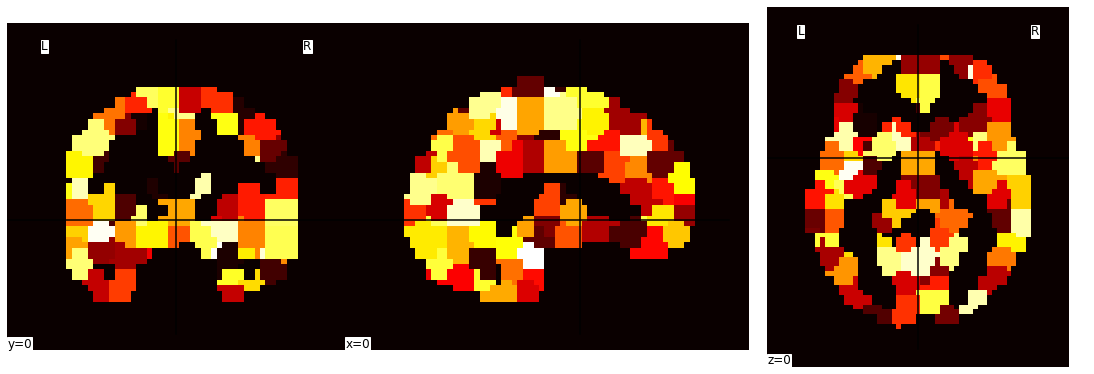

In [11]:
from niwidgets import NiftiWidget
from niwidgets import exampleatlas
atlas_widget = NiftiWidget(exampleatlas)
atlas_widget.nifti_plotter(plotting_func=nip.plot_img, display_mode=['ortho', 'x', 'y', 'z'], colormap='hot')

In [12]:
from niwidgets import SurfaceWidget
from niwidgets.exampledata import examplesurface

surface_widget = SurfaceWidget(examplesurface)
surface_widget.surface_plotter()

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [6]:
from niwidgets import SurfaceWidget
from niwidgets.exampledata import examplesurface
from niwidgets.exampledata import exampleoverlays

surface_widget = SurfaceWidget(examplesurface, overlayfiles=exampleoverlays)

surface_widget.surface_plotter()

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [7]:
from niwidgets import StreamlineWidget
from niwidgets.exampledata import streamlines

sw = StreamlineWidget(filename=streamlines)
style = {'axes': {'color': 'red',
                  'label': {'color': 'white'},
                  'ticklabel': {'color': 'white'},
                  'visible': False},
         'background-color': 'white',
         'box': {'visible': False}}
sw.plot(display_fraction=0.5, width=500, height=500, style=style, percentile=80)

interactive(children=(FloatSlider(value=44.99999313354492, continuous_update=False, description='threshold', m…

In [12]:
examplezmap

'/Users/christinejou/anaconda/envs/tensorflow/lib/python3.6/site-packages/niwidgets/data/cognitive control_pFgA_z.nii.gz'

### load data

In [14]:
rlabel = ""
elabel = ""
glabel = ""
w2vlabel = ""
bertlabel = ""
direction = "brain2model_"
validate = "cv_"
subject_number = 1
language = "spanish"
num_layers = 2
model_type = "brnn"
which_layer = 1
agg_type = "avg"

file_loc = str(rlabel) + str(elabel) + str(glabel) + str(w2vlabel) + str(bertlabel) + str(direction) + str(validate) + "subj{}_parallel-english-to-{}-model-{}layer-{}-pred-layer{}-{}"

file_name = file_loc.format(
    subject_number, 
    language, 
    num_layers, 
    model_type, 
    which_layer, 
    agg_type
)
file_name

'brain2model_cv_subj1_parallel-english-to-spanish-model-2layer-brnn-pred-layer1-avg'

In [3]:
import pickle
transform_data = pickle.load(open("../../3d-brain/"+file_name+"-transform-rmse.p", "rb"))

In [20]:
transform_data.shape

(79, 95, 68)

In [10]:
import numpy as np
import nibabel as nib

In [6]:
transform_nifti = nib.Nifti1Image(transform_data, affine=np.eye(4))

In [17]:
transform_nifti.header["qform_code"] = 4
transform_nifti.header["sform_code"] = 4
transform_nifti.header["pixdim"] = [-1., 2., 2., 2., 0., 0., 0., 0.]
transform_nifti.header["xyzt_units"] = 10
transform_nifti.header["quatern_c"] = 1.0
transform_nifti.header["qoffset_x"] = 78.0
transform_nifti.header["qoffset_y"] = -112.0
transform_nifti.header["qoffset_z"] = -70.0
transform_nifti.header["srow_x"] = [-2., 0., 0., 78.]
transform_nifti.header["srow_y"] = [0., 2., 0., -112.]
transform_nifti.header["srow_z"] = [0., 0., 2., -70.]
transform_nifti.header["dim"] = [3., 79., 95., 79., 1., 1., 1., 1.]

In [18]:
print(transform_nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 79 95 79  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [-2.  0.  0. 78.]
srow_y          : [ 

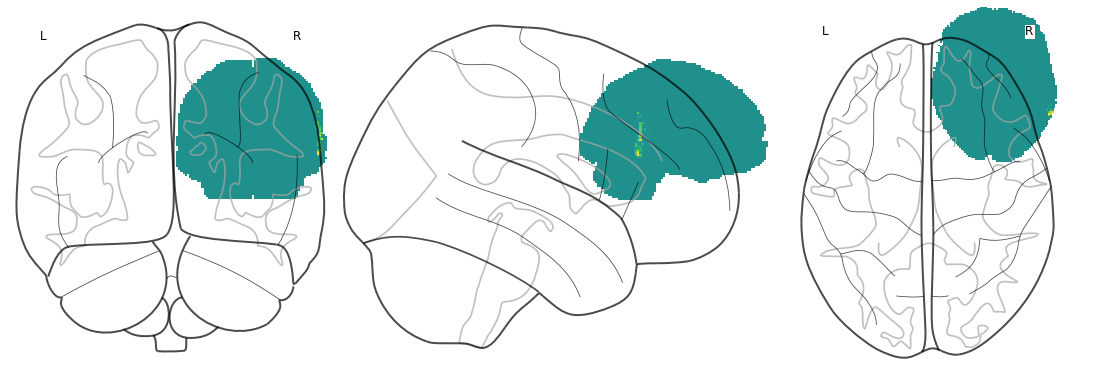

In [52]:
test = NiftiWidget(transform_nifti)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

In [23]:
aff = np.array([[-2., 0., 0., 0.], [0., 2., 0., 0.], [0., 0., 2., 0], [78., -112., -60., 1.]])
# aff = np.array([[-2., 0., 0., 0.], [0., 2., 0., 0.], [0., 0., 2., 0], [90., -126., -72., 1.]])
# real_data = nib.affines.apply_affine(aff, data)
# print("AFFINE TRANSFORM: " + str(real_data.shape))
# print("NIFTI: " + str(new_image))
old_new_image = nib.Nifti1Image(transform_data, affine=aff)

In [19]:
nib.save(transform_nifti, 'with_affine.nii.gz')

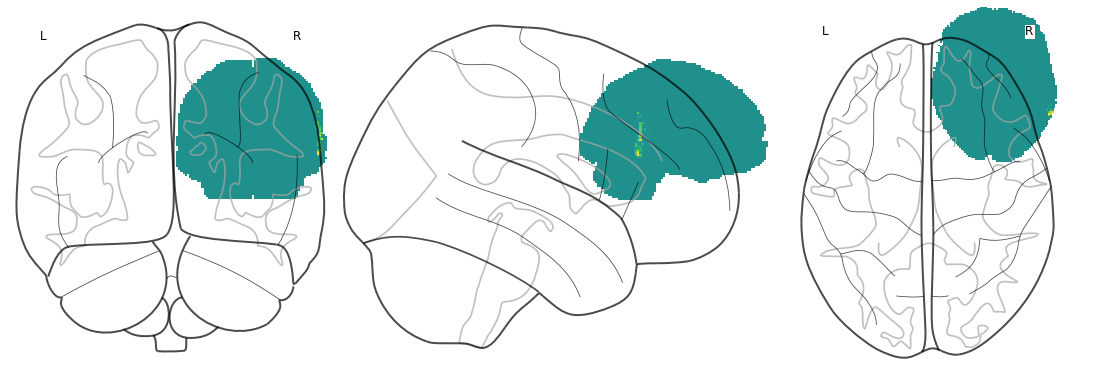

In [12]:
test = NiftiWidget(transform_nifti)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

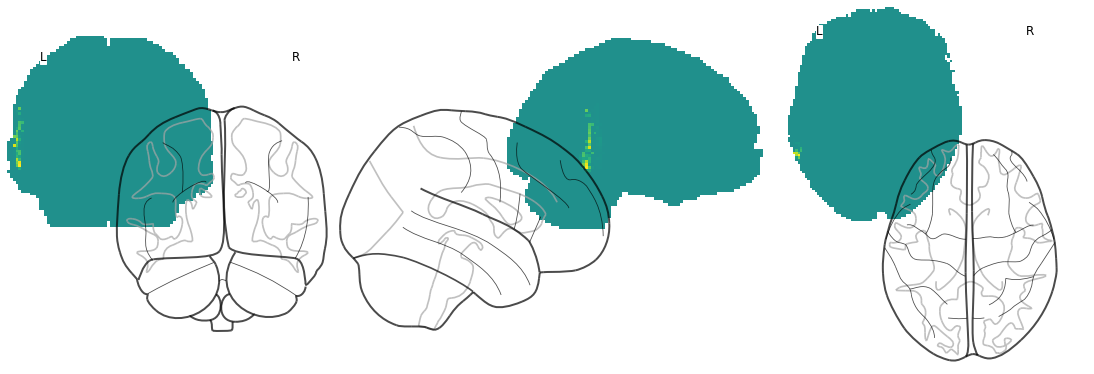

In [32]:
test = NiftiWidget("test.nii.gz")
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

In [40]:
mask = nib.load("../mask_from_uncertainty_study.nii")
print(mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 79 95 79  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'spm_spm:resultant analysis mask'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [

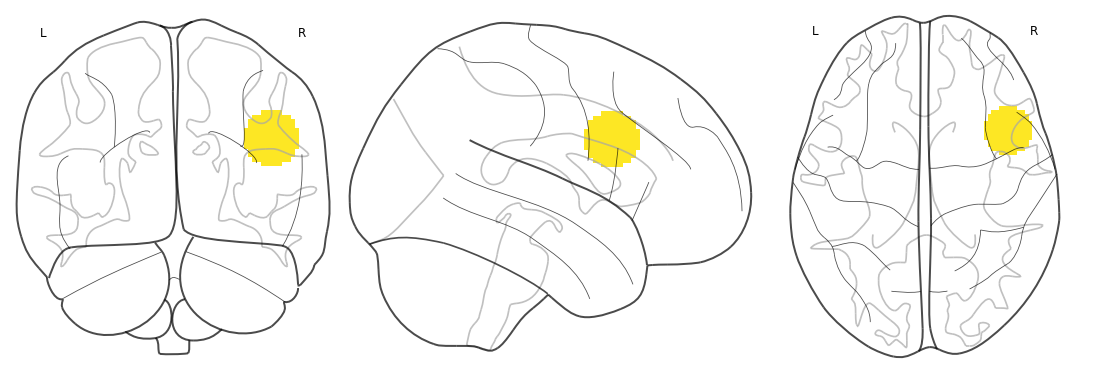

In [29]:
test = NiftiWidget("../mask_from_uncertainty_study.nii")
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

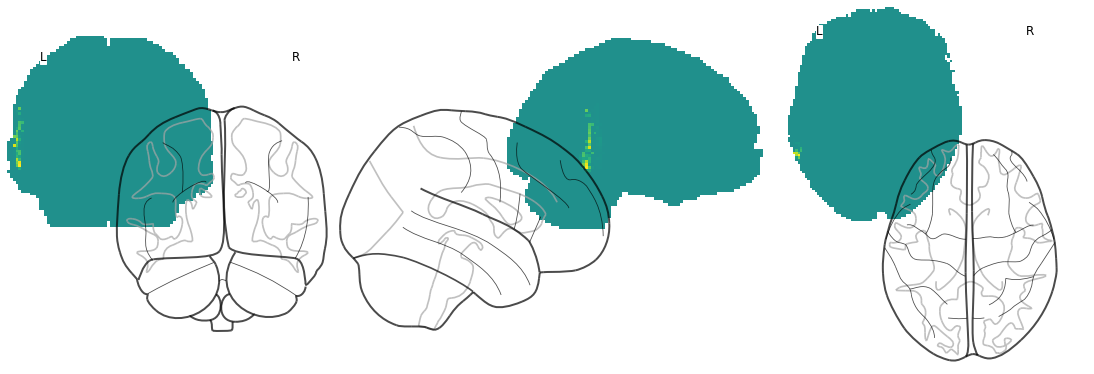

In [24]:
test = NiftiWidget(old_new_image)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

In [42]:
# aff = np.array([[-2., 0., 0., 0.], [0., 2., 0., 0.], [0., 0., 2., 0], [78., -112., -60., 1.]])
aff = np.array([[-2., 0., 0., 0.], [0., 2., 0., 0.], [0., 0., 2., 0], [90., -126., -72., 1.]])
# real_data = nib.affines.apply_affine(aff, data)
# print("AFFINE TRANSFORM: " + str(real_data.shape))
# print("NIFTI: " + str(new_image))
new_image = nib.Nifti1Image(transform_data, affine=aff)

In [43]:
new_image

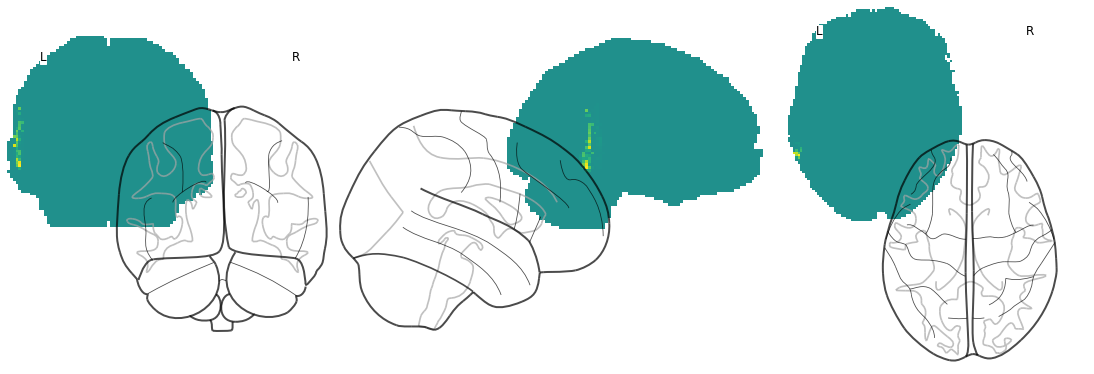

In [64]:
test = NiftiWidget(new_image)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

In [27]:
n2_img = nib.load(examplet1)
n2_img

In [50]:
new_image.header["dim"] = [  3, 91, 109,  91,   1,  1,  1,   1]

In [55]:
new_image.header["srow_x"] = [-2.,  0.,  0., 90.]
new_image.header["srow_y"] = [   0.,    2.,    0., -126.]
new_image.header["srow_z"] = [  0.,  0.,   2., -72.]

In [57]:
new_image.header["qoffset_x"] = 90.0
new_image.header["qoffset_y"] = -126.0
new_image.header["qoffset_y"] = -72

In [110]:
new_image.header["sform_code"] = 4 #"mni"
new_image.header["qform_code"] = 4 #"mni"

In [62]:
new_image.header["pixdim"] = [-1.,  2.,  2.,  2.,  1.,  0.,  0.,  0.]

In [111]:
print(new_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -72.0
qoffset_z       : 0.0
srow_x          : [-2.  0.  0. 90.]
srow_y          

In [31]:
print(n2_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.1'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]
srow_

In [30]:
n2_img.affine

array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [65]:
from nilearn.datasets import load_mni152_template

template = load_mni152_template()

In [66]:
new_image

In [72]:
print(transform_nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 79 95 68  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1. 0. 0.]

In [73]:
from nilearn.image import resample_to_img
from nilearn.image import load_img
from nilearn import plotting

In [86]:
def resample_affine(transform_nifti, template):
    resampled_stat_img = resample_to_img(transform_nifti, template)
    
    tmap_img = load_img(transform_nifti)

    original_shape = tmap_img.shape
    original_affine = tmap_img.affine

    resampled_shape = resampled_stat_img.shape
    resampled_affine = resampled_stat_img.affine

    template_img = load_img(template)
    template_shape = template_img.shape
    template_affine = template_img.affine
    print("""Shape comparison:
    - Original t-map image shape : {0}
    - Resampled t-map image shape: {1}
    - Template image shape       : {2}
    """.format(original_shape, resampled_shape, template_shape))

    print("""Affine comparison:
    - Original t-map image affine :\n {0}
    - Resampled t-map image affine:\n {1}
    - Template image affine       :\n {2}
    """.format(original_affine, resampled_affine, template_affine))
    
    plotting.plot_glass_brain(transform_nifti,
                       bg_img=template,
                       cut_coords=(36, -27, 66),
                       threshold="auto",
                       title="t-map in original resolution")
    plotting.plot_glass_brain(resampled_stat_img,
                           bg_img=template,
                           cut_coords=(36, -27, 66),
                           threshold="auto",
                           title="Resampled t-map")
    plotting.show()
    return resampled_stat_img

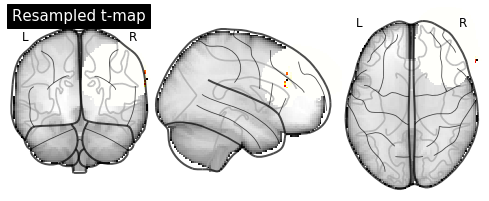

In [80]:
plotting.plot_glass_brain(resampled_stat_img,
                           bg_img=template,
                           cut_coords=(36, -27, 66),
                           threshold="auto",
                           title="Resampled t-map")

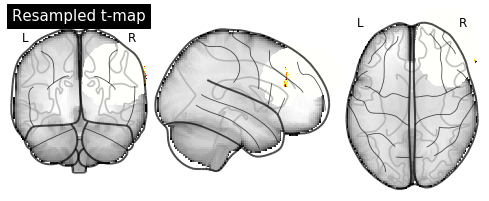

In [81]:
plotting.plot_glass_brain(transform_nifti,
                           bg_img=template,
                           cut_coords=(36, -27, 66),
                           threshold="auto",
                           title="Resampled t-map")

Shape comparison:
    - Original t-map image shape : (79, 95, 68)
    - Resampled t-map image shape: (91, 109, 91)
    - Template image shape       : (91, 109, 91)
    
Affine comparison:
    - Original t-map image affine :
 [[  -2.    0.    0.    0.]
 [   0.    2.    0.    0.]
 [   0.    0.    2.    0.]
 [  78. -112.  -60.    1.]]
    - Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    - Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    


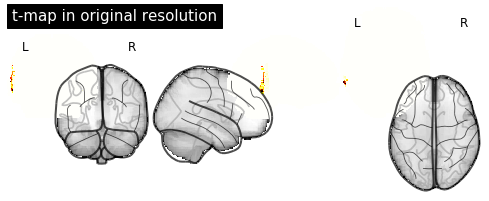

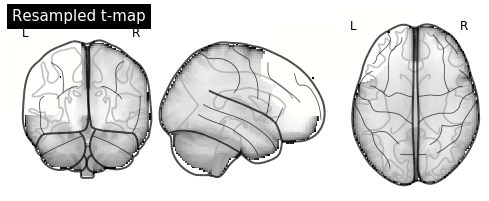

In [89]:
old_resampled_stat_img = resample_affine(old_new_image, template)

Shape comparison:
    - Original t-map image shape : (79, 95, 68)
    - Resampled t-map image shape: (91, 109, 91)
    - Template image shape       : (91, 109, 91)
    
Affine comparison:
    - Original t-map image affine :
 [[  -2.    0.    0.    0.]
 [   0.    2.    0.    0.]
 [   0.    0.    2.    0.]
 [  90. -126.  -72.    1.]]
    - Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    - Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    


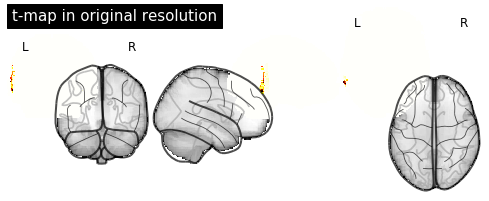

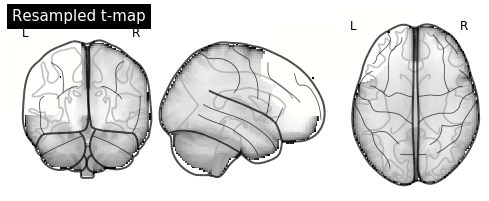

In [87]:
resampled_stat_img = resample_affine(new_image, template)

Shape comparison:
    - Original t-map image shape : (79, 95, 68)
    - Resampled t-map image shape: (91, 109, 91)
    - Template image shape       : (91, 109, 91)
    
Affine comparison:
    - Original t-map image affine :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
    - Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    - Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
    


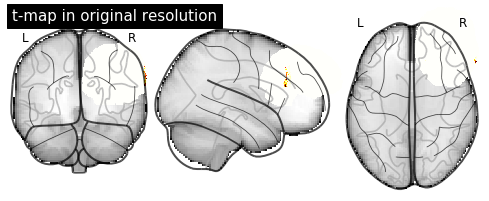

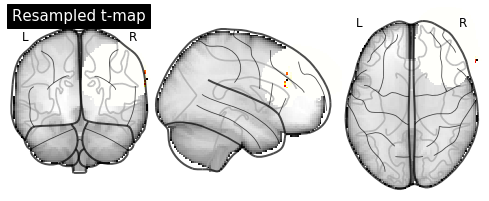

In [92]:
transform_nifti_stat_img = resample_affine(transform_nifti, template)

In [101]:
print(new_image.get_sform())

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [100]:
new_image.affine

array([[  -2.,    0.,    0.,    0.],
       [   0.,    2.,    0.,    0.],
       [   0.,    0.,    2.,    0.],
       [  90., -126.,  -72.,    1.]])

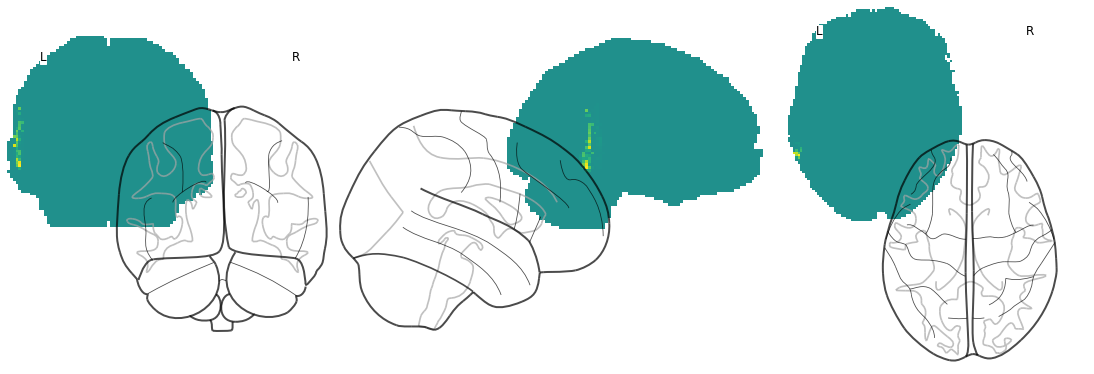

In [112]:
test = NiftiWidget(new_image)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

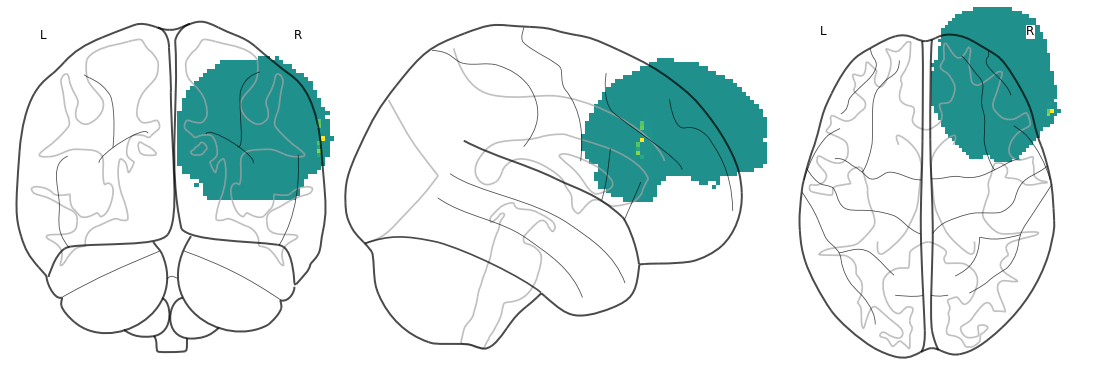

In [93]:
test = NiftiWidget(transform_nifti_stat_img)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

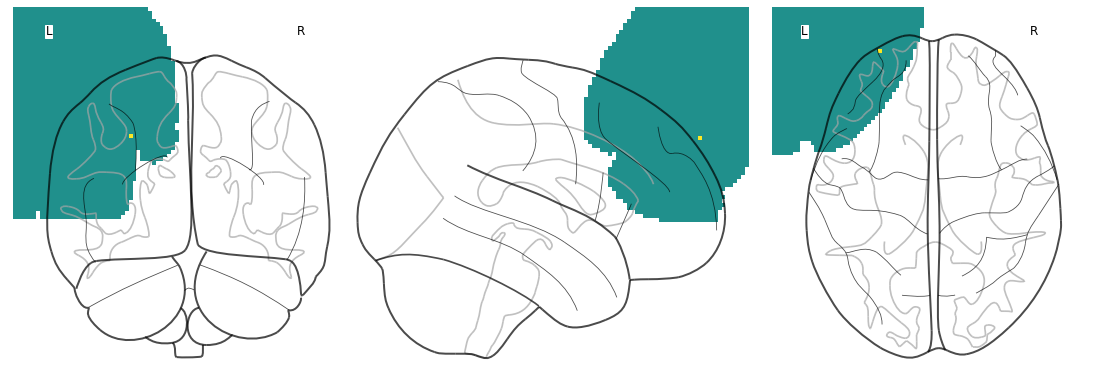

In [88]:
test = NiftiWidget(resampled_stat_img)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

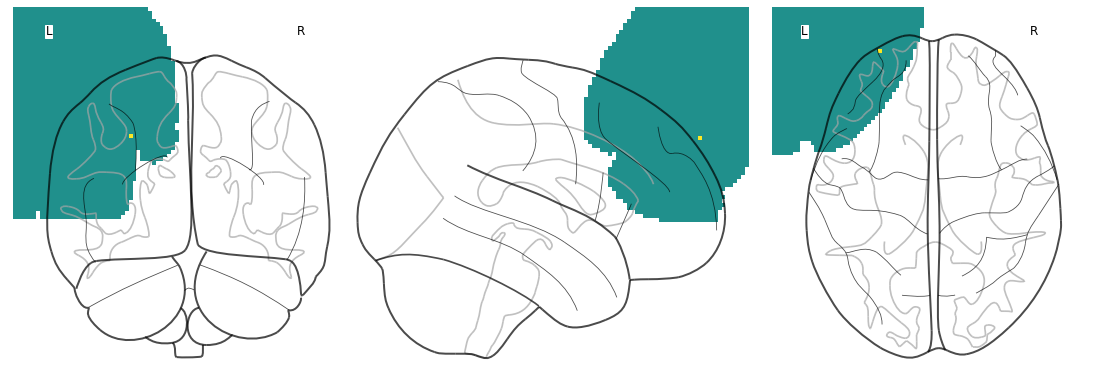

In [90]:
test = NiftiWidget(old_resampled_stat_img)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

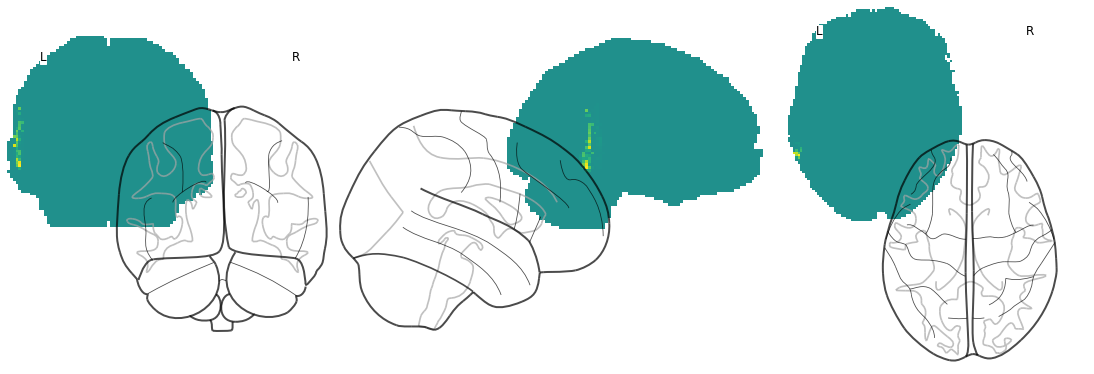

In [91]:
test = NiftiWidget(new_image)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])

In [108]:
print(old_new_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 79 95 68  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [-2.  0.  0.  0.]
srow_y          : [0. 2. 0.

In [107]:
old_new_image.header["sform_code"] = 4 #"mni"
old_new_image.header["qform_code"] = 4 #"mni"

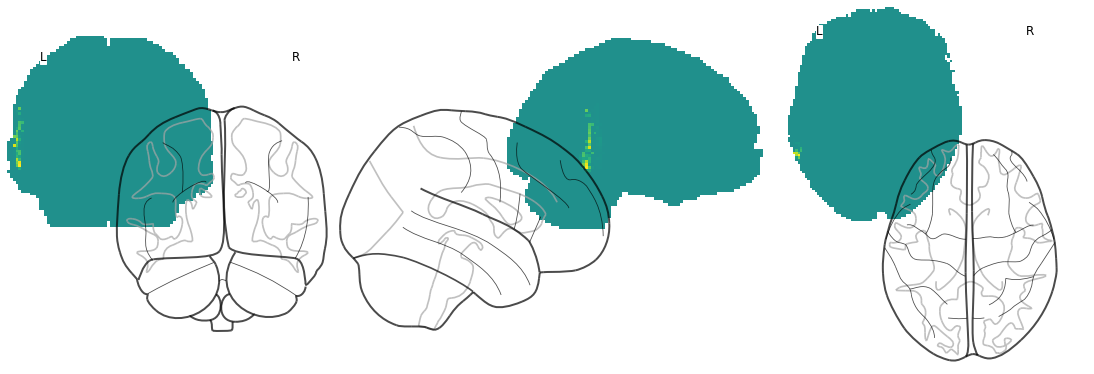

In [109]:
test = NiftiWidget(old_new_image)
test.nifti_plotter(plotting_func=nip.plot_glass_brain,
                   display_mode=['ortho','xz'])